In [1]:
import pandas as pd
import numpy as np

In [2]:
def describe (table):
    for i in table.columns:
        print(i, '\n')
        print(table[i].isnull().count(), '\n')
        print(table[i].describe(), '\n')

In [3]:
covidRegion = pd.read_csv('./covid_19_/Region.csv')
covidRegion.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,서울,서울,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,서울,강남구,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,서울,강동구,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,서울,강북구,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,서울,강서구,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


위 데이터들의 칼럼들을 보니 여기서 알아낼 수 있는 것은 어떤 지역에 노인 인구 밀집도를 나타내는 것은 covidRegion 데이터 밖에 없음을 알 수 있었다. 따라서 covidRegion데이터를 전처리 해보자
1. city와 elderly_population_ratio 열들을 선택
2. matplotlib을 사용하여 그래프로 나타냄

In [4]:
elder = covidRegion.loc[:, ['latitude', 'longitude', 'elderly_population_ratio']]
elder.head(10)

,latitude,longitude,elderly_population_ratio
0,37.566953,126.977977,15.38
1,37.518421,127.047222,13.17
2,37.530492,127.123837,14.55
3,37.639938,127.025508,19.49
4,37.551166,126.849506,14.39
5,37.478290,126.951502,15.12
6,37.538712,127.082366,13.75
7,37.495632,126.887650,16.21
8,37.456852,126.895229,16.15
9,37.654259,127.056294,15.40


In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0.5, 'latitude'), Text(0.5, 0, 'longitude')]

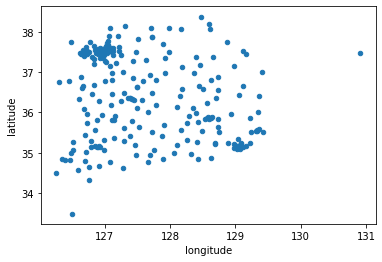

In [14]:
ax = elder.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel="longitude", ylabel="latitude")

[Text(0, 0.5, 'latitude'), Text(0.5, 0, 'longitude')]

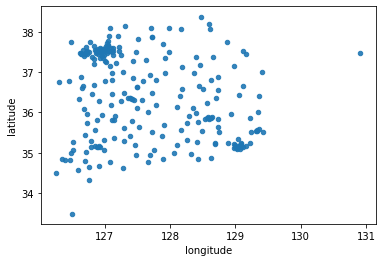

In [15]:
ax = elder.plot(kind="scatter", x="longitude", y="latitude", alpha=0.9)
ax.set(xlabel="longitude", ylabel="latitude")

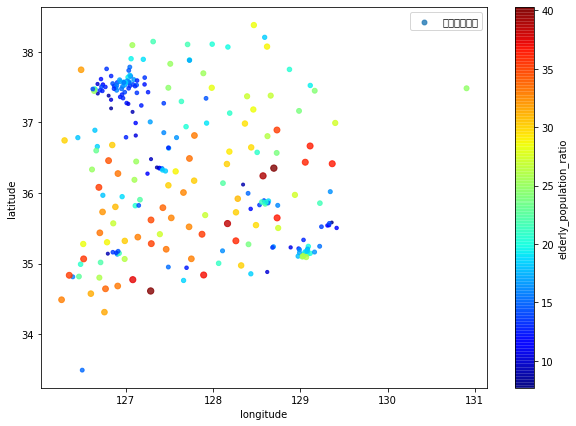

In [16]:
ax = elder.plot(kind="scatter", x="longitude", y="latitude", alpha=0.8,
               s=elder['elderly_population_ratio'], label="노인인구비율", figsize=(10,7),
               c="elderly_population_ratio", cmap=plt.get_cmap("jet"), colorbar=True,
               sharex=False)
ax.set(xlabel='longitude', ylabel='latitude')
plt.legend()